# Analyze your own Personal Netflix Data

## Import libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib

## Read csv file

In [2]:
df = pd.read_csv('C:/Users/Atharva/Downloads/ViewingActivity.csv')
df

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,3/20/2013 5:17,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,3/20/2013 4:27,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,3/20/2013 4:05,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,3/20/2013 0:20,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,3/20/2013 0:10,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)
...,...,...,...,...,...,...,...,...,...,...
195,Charlie,3/2/2013 0:45,0:05:18,NaN,Star Trek: Deep Space Nine: Season 4: Body Par...,NaN,Mac,0:27:16,Not latest view,US (United States)
196,Charlie,3/1/2013 23:46,0:58:12,NaN,Louis C.K.: Live at the Beacon Theater,NaN,Mac,1:01:37,Not latest view,US (United States)
197,Charlie,3/1/2013 23:21,0:21:59,NaN,Star Trek: Deep Space Nine: Season 4: Body Par...,NaN,Mac,0:22:01,Not latest view,US (United States)
198,Charlie,3/1/2013 22:36,0:44:26,NaN,Star Trek: Deep Space Nine: Season 4: The Quic...,NaN,Mac,0:44:28,0:44:28,US (United States)


## Drop unneccessary columns from the dataset

In [3]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'],axis = 1)
df

,Start Time,Duration,Title
0,3/20/2013 5:17,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,3/20/2013 4:27,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,3/20/2013 4:05,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,3/20/2013 0:20,0:48:14,The Invisible War
4,3/20/2013 0:10,0:04:51,The Invisible War
...,...,...,...
195,3/2/2013 0:45,0:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...
196,3/1/2013 23:46,0:58:12,Louis C.K.: Live at the Beacon Theater
197,3/1/2013 23:21,0:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...
198,3/1/2013 22:36,0:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...


In [4]:
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

## Convert all attributes into suitable data types

In [5]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc =True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [6]:
df = df.set_index('Start Time')

In [7]:
df.index = df.index.tz_convert('US/Eastern')

In [8]:
df = df.reset_index()

In [9]:
df.head(5)

,Start Time,Duration,Title
0,2013-03-20 01:17:00-04:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 00:27:00-04:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 00:05:00-04:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19 20:20:00-04:00,0:48:14,The Invisible War
4,2013-03-19 20:10:00-04:00,0:04:51,The Invisible War


In [10]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [11]:
df.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

## Check watch time of 'The Office' show 

In [12]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex = False)]

In [13]:
office.shape

(137, 3)

## Consider watch time if only greater than 30 seconds

In [14]:
office = office[office['Duration'] > '0 days 00:00:30']
office.shape

(133, 3)

## Total time spend watching the show

In [15]:
office['Duration'].sum()

Timedelta('1 days 15:00:10')

## Watched per day and per hour

In [16]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour
office.head()

,Start Time,Duration,Title,weekday,hour
10,2013-03-18 19:04:00-04:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,0,19
11,2013-03-18 18:42:00-04:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,0,18
12,2013-03-18 18:21:00-04:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,0,18
13,2013-03-18 18:20:00-04:00,0 days 00:00:55,The Office (U.S.): Season 5: Business Trip (Ep...,0,18
14,2013-03-18 16:29:00-04:00,0 days 00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...,0,16


## Data Visualization 

<AxesSubplot:title={'center':'Office Episodes Watched per Day '}>

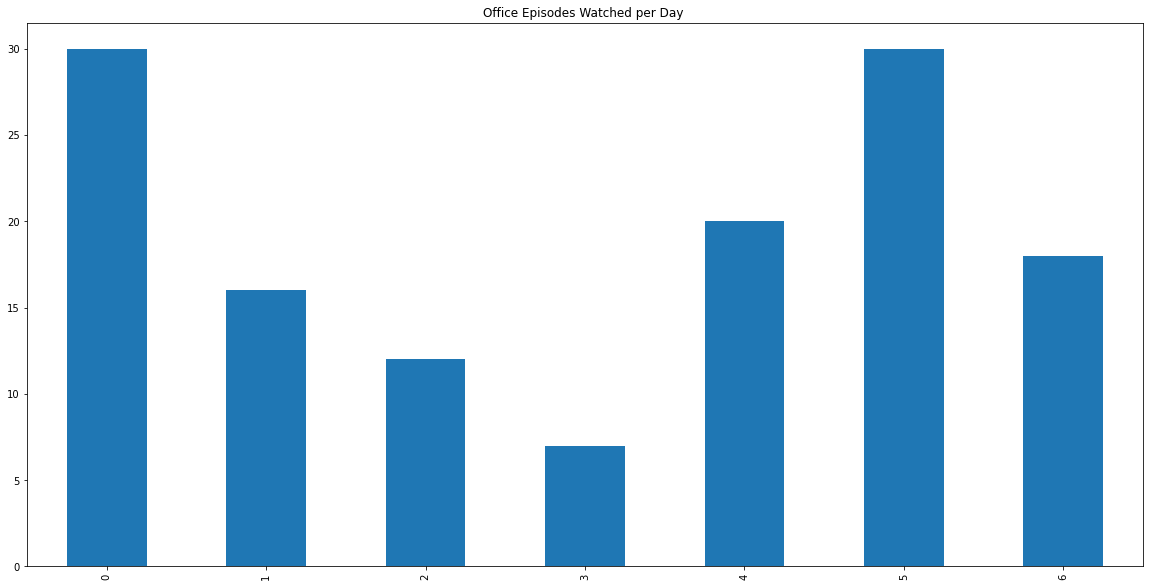

In [17]:
office['weekday'] = pd.Categorical(office['weekday'], categories = [0,1,2,3,4,5,6], ordered = True)
office_by_day = office['weekday'].value_counts()
office_by_day = office_by_day.sort_index()
office_by_day.plot(kind = 'bar', figsize = (20,10), title = "Office Episodes Watched per Day ")

In [18]:
""" # set our categorical and define the order so the days are plotted Monday-Sunday
 office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True) 

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched per Day 
"""

" # set our categorical and define the order so the days are plotted Monday-Sunday\n office['weekday'] = pd.Categorical(office['weekday'], categories=\n    [0,1,2,3,4,5,6],\n    ordered=True) \n\n# create office_by_day and count the rows for each weekday, assigning the result to that variable\noffice_by_day = office['weekday'].value_counts()\n\n# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.\noffice_by_day = office_by_day.sort_index()\n\n# optional: update the font size to make it a bit larger and easier to read\nmatplotlib.rcParams.update({'font.size': 22})\n\n# plot office_by_day as a bar chart with the listed size and title\noffice_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched per Day \n"

<AxesSubplot:title={'center':'Office Episodes Watched per Hour '}>

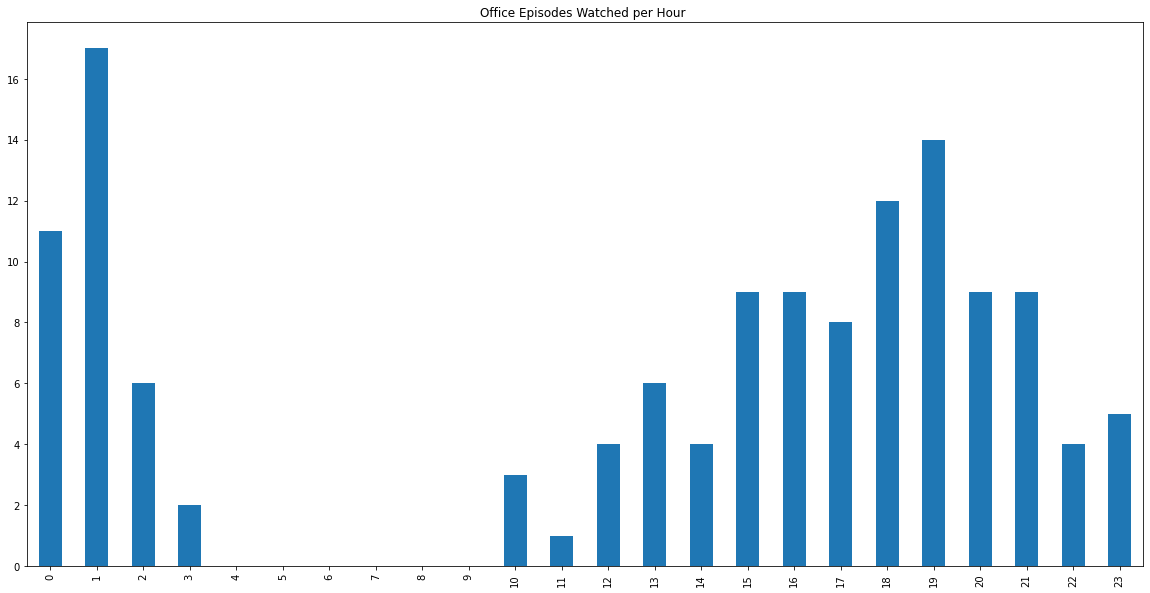

In [19]:
office['hour'] = pd.Categorical(office['hour'], categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered = True)
office_by_hour = office['hour'].value_counts()
office_by_hour = office_by_hour.sort_index()
office_by_hour.plot(kind = 'bar', figsize = (20,10), title = "Office Episodes Watched per Hour ")